# Ejercicio de programación Regresión Lineal Multiple

In [5]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd
import sklearn as skl

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D
from sklearn.preprocessing import OneHotEncoder #para convertir textos en números
from sklearn.model_selection import train_test_split #libreria para dividir los datos para entrenamiento y prueba

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## 2 Regresión lineal con multiples variables

Se implementa la regresion lineal multivariable para predecir el precio del Mercado inmobiliario de Melbourne. El archivo `Melbourne_housing_FULL.csv` contiene un conjunto de entrenamiento de precios inmobiliario en Melbourne.La columna 1(lenguale maquina) es el precio, y las demas columnas con las caracteristicas como numero de habitaciones, tipo(caza, cabaña, terraza), capacidad de garaje, ubicacion etc. Se trabajó las columnas que contienen textos combirtiendolas a datos numéricos usando la libreria OneHotEncoder, es decir que añade nuevas columnas por cada categoria que exita en la calomna anterior por ejemplo tipos(t,u) donde las columnas llegan a ser tipo_t, tipo_u etc, estos contienen valores binarios 1 cuando sí se pertenece a ese tipo y cero cuando no se pertenece, despues se eliminó las filas que contenian valores nulos.
Se dividio los datos en un 95% para el entrenamiento y en un 5% para la prediccion 147(mayor a 100 que se pidió).


In [54]:
# Cargar datos
# data = np.loadtxt(os.path.join('Datasets', 'ex1data2.txt'), delimiter=',')
data = pd.read_csv('/content/gdrive/MyDrive/SIS420 IA 1/datasets/Propios/Melbourne_housing_FULL.csv', delimiter=',')
data = data.drop(data.columns[[0,1,6,7,16,19]], axis=1)
data = data.dropna() #Elimina las columnas que contengan valores nulos
#display(data) #imprime en formato dataframe(como exel)

#convertimos textos a numeros
one_hot_encoder_type = OneHotEncoder(sparse_output=False, drop='first') #instancia de OneHotEncoder para Type
Type_num = one_hot_encoder_type.fit_transform(data[['Type']])

one_hot_encoder_method = OneHotEncoder(sparse_output=False, drop='first') #instancia de OneHotEncoder para Method
Method_num = one_hot_encoder_method.fit_transform(data[['Method']])

#convertimos al fromato DataFrame
Type_num_df = pd.DataFrame(Type_num, columns=one_hot_encoder_type.get_feature_names_out(['Type']))
Method_num_df = pd.DataFrame(Method_num, columns=one_hot_encoder_method.get_feature_names_out(['Method']))

#concatenar los nuevos valores con los del data original
data = pd.concat([data, Type_num_df, Method_num_df], axis=1)

data = data.dropna() #Elimina las filas que contengan almenos 1 valor nulo
data = data.drop(data.columns[[1,3]], axis=1) #eliminamos las columnas antiguas de Type y Method
display(data) #imprimimos para verificar el resultado

X = pd.concat([data.iloc[:, :1], data.iloc[:, 2:]], axis=1) #selecciona todas las columnas X
y = data.iloc[:, 1]  #selecciona la columna Y

# Divide los datos en 95% para entrenamiento y 5% para predicción
X_train, X_prediccion, y_train, _ = train_test_split(X, y, test_size=0.05, random_state=42)

X=X_train
y=y_train

#print(data.describe()) #imprime un resumen del data

# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)

m = y.size
print(m) #muestra el numero de m para el entrenamiento
print(X_prediccion.shape[0]) #muestra el numero de m para la prueba y prediccion del final

#print(X)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X.iloc[i, 0], X.iloc[i, 1], y.iloc[i])) #esto solo imprime numeros, por lo que primero se tratar los textos

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB
2,2.0,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.0,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,0.0,0.0,1.0,0.0,0.0,0.0
6,4.0,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,0.0,0.0,0.0,0.0,0.0,1.0
11,3.0,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,4019.0,0.0,0.0,1.0,0.0,0.0,0.0
14,2.0,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,4019.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8870,3.0,1275000.0,2.6,3121.0,3.0,2.0,1.0,132.0,95.0,1900.0,-37.8220,145.0041,14949.0,0.0,0.0,1.0,0.0,0.0,0.0
8877,4.0,1510000.0,2.6,3121.0,4.0,2.0,0.0,0.0,171.0,1900.0,-37.8206,145.0099,14949.0,0.0,0.0,1.0,0.0,0.0,0.0
8878,3.0,1550000.0,2.6,3121.0,3.0,2.0,1.0,131.0,76.0,1900.0,-37.8132,144.9929,14949.0,0.0,0.0,0.0,0.0,0.0,0.0
8882,3.0,1456000.0,2.6,3121.0,3.0,2.0,1.0,157.0,141.0,1900.0,-37.8225,145.0029,14949.0,0.0,0.0,0.0,0.0,0.0,0.0


  X[:,0] X[:, 1]         y
--------------------------
2792
147
       1       8    510000
       2       4   1222500
       4      11    882000
       2      12    585500
       3      14   1200000
       5       7   2340000
       4      13    550000
       3      11   1782500
       2       5    890000
       1      11    290000




Aqui no se necesito modificacion, se usaron las funciones tal cual

In [25]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [13]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

      Rooms  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
3823    1.0       7.7    3184.0       1.0       1.0  1.0       0.0   
4304    2.0       3.5    3068.0       2.0       1.0  2.0     487.0   
1703    4.0      10.8    3019.0       4.0       2.0  2.0     393.0   
7500    2.0      11.5    3046.0       2.0       1.0  1.0     161.0   
1573    3.0      13.9    3165.0       3.0       1.0  1.0     640.0   
...     ...       ...       ...       ...       ...  ...       ...   
4891    4.0      13.0    3046.0       4.0       2.0  8.0     977.0   
3417    4.0       7.8    3058.0       4.0       2.0  2.0      43.0   
3513    3.0       9.2    3058.0       3.0       2.0  3.0     472.0   
3925    2.0       7.7    3184.0       2.0       1.0  1.0       0.0   
2686    3.0       7.8    3124.0       3.0       1.0  1.0     544.0   

      BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount  Type_t  \
3823          60.0     2001.0   -37.8857    144.9884         8989.0     0.0   
4

Creamos una funcion que nos ayude con las graficas de cada dato respecto a Y

In [14]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('personas')
    pyplot.xlabel('caracteristicas de la inmoviliaria')

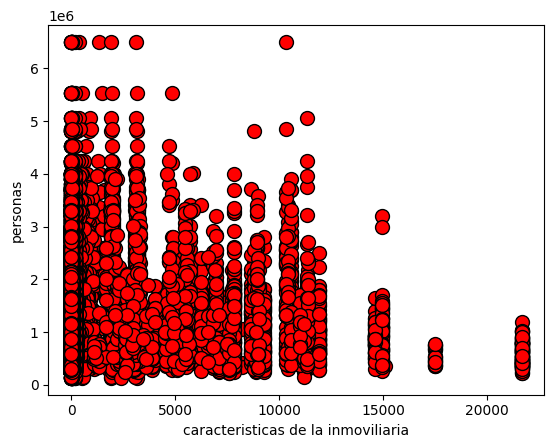

In [15]:
plotData(X, y)

Se añade x0 con sus valores de unos a la matriz de x nomaliazada `X_norm`:

In [16]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [17]:
print(X)


[[ 1.         -1.94039619 -0.2543795  ... -0.0849412  -0.43193788
  -0.33120678]
 [ 1.         -0.92128668 -1.47300674 ... -0.0849412  -0.43193788
  -0.33120678]
 [ 1.          1.11693234  0.64508346 ... -0.0849412  -0.43193788
  -0.33120678]
 ...
 [ 1.          0.09782283  0.18084451 ... -0.0849412   2.3151477
  -0.33120678]
 [ 1.         -0.92128668 -0.2543795  ... -0.0849412  -0.43193788
  -0.33120678]
 [ 1.          0.09782283 -0.22536456 ... -0.0849412  -0.43193788
  -0.33120678]]


aqui tambien nose nesecitó modificar nada, y se utilizo las formulas tal cual estaban

In [18]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    # h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [19]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


Aqui se modificó la inicializacion de theta, ya que se llena de ceros en un espacio de `X.shape[1]` que devuelve el numero de columnas que contiene X contando tambien la columna añadida X0

theta calculado por el descenso por el gradiente: [1128212.1357449   221322.43623892 -157302.30257255   86372.67015723
   -4458.58419018  160548.12844956   75209.6238933    42716.98580317
  127136.50075287 -164737.68919949  -58456.76814651   88531.68334559
  -23534.32341594    8833.06113558   11954.58767455   12726.46301748
    6634.17076291   12869.40878771    7569.29784034]


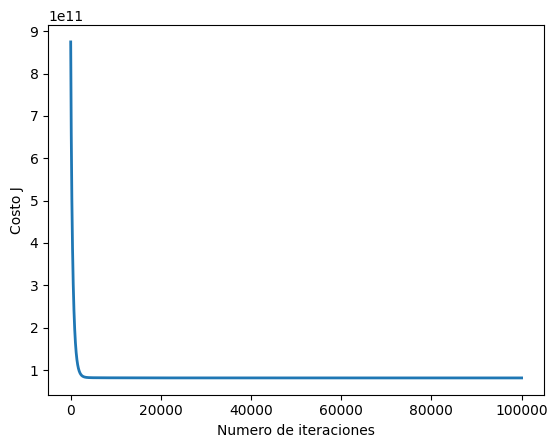

In [23]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 500000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))


Aqui se predice el precio de nuevas inmoviliarias, con valores de X_prediccion que no se ha entrenado, y que se han guardado al princio para este propócito, estos valores se los normaliza con los valores de mu y sigma guardadoes en la normalizacion del entrenamiento, y luego solo se los multiplica con las thetas tabien resultado del entrenamiento con lo que ya salen las nuevas Y, en este caso los precios

In [27]:
#X_array = [2.0,	1464000.0,	3.5,	3061.0,	2.5,	1.8,	0.3,	44.0,	180.0,	2500.0,	-35.8093,	244.9944,	3519.0,	1.0,	0.0,	0.0,	0.0,	1.0,	0.0]
X_prediccion_norm = (X_prediccion - mu) / sigma
m_prediccion = X_prediccion.shape[0]
X_prediccion = np.concatenate([np.ones((m_prediccion, 1)), X_prediccion_norm], axis=1)
print(X_prediccion.shape[1])

19


In [28]:
price = np.dot(X_prediccion, theta)

for i, p in enumerate(price, 1):
    print(f'El precio predicho para el conjunto de datos {i} (usando descenso por el gradiente): ${p:.0f}') #imprime todos los precios

El precio predicho para el conjunto de datos 1 (usando descenso por el gradiente): $1373565
El precio predicho para el conjunto de datos 2 (usando descenso por el gradiente): $1387520
El precio predicho para el conjunto de datos 3 (usando descenso por el gradiente): $543821
El precio predicho para el conjunto de datos 4 (usando descenso por el gradiente): $1507798
El precio predicho para el conjunto de datos 5 (usando descenso por el gradiente): $1369645
El precio predicho para el conjunto de datos 6 (usando descenso por el gradiente): $1840963
El precio predicho para el conjunto de datos 7 (usando descenso por el gradiente): $1007013
El precio predicho para el conjunto de datos 8 (usando descenso por el gradiente): $828092
El precio predicho para el conjunto de datos 9 (usando descenso por el gradiente): $1612495
El precio predicho para el conjunto de datos 10 (usando descenso por el gradiente): $1335795
El precio predicho para el conjunto de datos 11 (usando descenso por el gradiente

<a id="section7"></a>
### 2.3 Ecuacion de la Normal

Hacemos el mismo procesamiento de los datos, convitiendo los textos en numeros, eliminando las filas con valores nulos, dividiendo los datos, etc.

In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np
import pandas as pd
import sklearn as skl

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D
from sklearn.preprocessing import OneHotEncoder #para convertir textos en números
from sklearn.model_selection import train_test_split #libreria para dividir los datos para entrenamiento y prueba

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [6]:
# Cargar datos
# data = np.loadtxt(os.path.join('Datasets', 'ex1data2.txt'), delimiter=',')
data = pd.read_csv('/content/gdrive/MyDrive/SIS420 IA 1/datasets/Propios/Melbourne_housing_FULL.csv', delimiter=',')
data = data.drop(data.columns[[0,1,6,7,16,19]], axis=1)
data = data.dropna() #Elimina las columnas que contengan valores nulos


#convertimos textos a numeros
one_hot_encoder_type = OneHotEncoder(sparse_output=False, drop='first') #instancia de OneHotEncoder para Type
Type_num = one_hot_encoder_type.fit_transform(data[['Type']])

one_hot_encoder_method = OneHotEncoder(sparse_output=False, drop='first') #instancia de OneHotEncoder para Method
Method_num = one_hot_encoder_method.fit_transform(data[['Method']])

#convertimos al fromato DataFrame
Type_num_df = pd.DataFrame(Type_num, columns=one_hot_encoder_type.get_feature_names_out(['Type']))
Method_num_df = pd.DataFrame(Method_num, columns=one_hot_encoder_method.get_feature_names_out(['Method']))

#concatenar los nuevos valores con los del data original
data = pd.concat([data, Type_num_df, Method_num_df], axis=1)

data = data.dropna() #Elimina las filas que contengan almenos 1 valor nulo
data = data.drop(data.columns[[1,3]], axis=1) #eliminamos las columnas antiguas de Type y Method

X = pd.concat([data.iloc[:, :1], data.iloc[:, 2:]], axis=1) #selecciona todas las columnas X
y = data.iloc[:, 1]  #selecciona la columna Y

# Divide los datos en 95% para entrenamiento y 5% para predicción
X_train, X_prediccion, y_train, _ = train_test_split(X, y, test_size=0.05, random_state=42)

X=X_train
y=y_train

#print(data.describe()) #imprime un resumen del data

# imprimir algunos puntos de datos
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)

m = y.size
print(m) #muestra el numero de m para el entrenamiento
print(X_prediccion.shape[0]) #muestra el numero de m para la prueba y prediccion del final

#print(X)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X.iloc[i, 0], X.iloc[i, 1], y.iloc[i])) #esto solo imprime numeros, por lo que primero se tratar los textos

  X[:,0] X[:, 1]         y
--------------------------
2792
147
       1       8    510000
       2       4   1222500
       4      11    882000
       2      12    585500
       3      14   1200000
       5       7   2340000
       4      13    550000
       3      11   1782500
       2       5    890000
       1      11    290000


In [7]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [10]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para una casa de superficie de 1650 sq-ft y tres dormitorios
price = np.dot(X_prediccion, theta)

for i, p in enumerate(price, 1):
    print(f'El precio predicho para el conjunto de datos {i} (usando descenso por el gradiente): ${p:.0f}') #imprime todos los precios


Theta calculado a partir de la ecuación de la normal: [ 2.32856535e+05 -4.23522555e+04  3.05965153e+03 -1.14177756e+04
  2.24862099e+05  8.40952760e+04  7.29021366e+01  1.23965146e+03
 -4.36793884e+03 -1.09696066e+05 -3.38163062e+04 -4.78833351e+00
  4.85369775e+04  4.01462969e+04  2.90049916e+04  6.19540833e+04
  3.56413456e+04  2.35440354e+04]
El precio predicho para el conjunto de datos 1 (usando descenso por el gradiente): $1368425
El precio predicho para el conjunto de datos 2 (usando descenso por el gradiente): $1428813
El precio predicho para el conjunto de datos 3 (usando descenso por el gradiente): $731422
El precio predicho para el conjunto de datos 4 (usando descenso por el gradiente): $1523021
El precio predicho para el conjunto de datos 5 (usando descenso por el gradiente): $1431970
El precio predicho para el conjunto de datos 6 (usando descenso por el gradiente): $1720605
El precio predicho para el conjunto de datos 7 (usando descenso por el gradiente): $1120784
El precio

# Ejercicio de programación Regresión Polinomial

In [62]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [86]:
# Cargar datos

data = pd.read_csv('/content/gdrive/MyDrive/SIS420 IA 1/datasets/Propios/Ice_cream selling data.csv', delimiter=',')

X = data.iloc[:, 0]
y = data.iloc[:, 1]

m_poly = y.size



In [87]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression

# para generar características polinómicas
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
print(X.shape)
X = pf.fit_transform(np.array(X).reshape(-1,1))  # transformamos la entrada en polinómica. Convertimos la Serie a un array NumPy
print(X.shape)
regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression

# instruimos a la regresión lineal que aprenda de los datos (ahora polinómicos) (X,y)
regresion_lineal.fit(X, y)

# vemos los parámetros que ha estimado la regresión lineal
print('theta = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

# resultado: w = [0 -4.54 4.95 0.1], b = -57.52

(49,)
(49, 4)
theta = [ 0.         -1.48090353  1.8243121   0.05141274], b = 3.061373017339161


In [88]:
#Usando la funcion de featureNormalice para normalizar
X_norm_poly, mu_poly, sigma_poly = featureNormalize(X)
X_poli_ready = np.concatenate([np.ones((m, 1)), X_norm_poly], axis=1)

print(len(sigma_poly))
print(len(mu_poly))


4
4


<ipython-input-25-5d5fd4234871>:9: RuntimeWarning: invalid value encountered in divide
  X_norm = (X - mu) / sigma


In [ ]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 500000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])

theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))


In [75]:
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)
# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X)
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y, y_pred = prediccion_entrenamiento)
# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(X, y)
print('Coeficiente de Determinación R2 = ' + str(r2))

Error Cuadrático Medio (MSE) = 9.327243445671257
Raíz del Error Cuadrático Medio (RMSE) = 3.0540536088404306
Coeficiente de Determinación R2 = 0.9367011897445384


In [ ]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Edad personas')
    pyplot.xlabel('Capacidad adquisitiva 1,000s')


In [ ]:
plotData(X[:,1], y)
pyplot.plot(X[:, 1], np.dot(X, regresion_lineal.coef_), '-')

In [ ]:
X_array = np.array([25])
pf = PolynomialFeatures(degree = 3)    # usaremos polinomios de grado 3
X_array = pf.fit_transform(X_array.reshape(-1,1))
prediccion_test = regresion_lineal.predict(X_array)
print(prediccion_test)